In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv", index_col='Id')
print(train.shape)
train.tail(5)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [38]:
test = pd.read_csv("test.csv", index_col='Id')
print(test.shape)
test.tail(5)

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [3]:
target = train.loc[:,'SalePrice']
train = train.drop(['SalePrice'], axis=1)

In [4]:
df = pd.concat([train, test], axis=0)
print(df.shape)
print(df.dtypes.value_counts())

(2919, 79)
object     43
int64      25
float64    11
dtype: int64


In [5]:
#after plotting the data, we realize that these columns need to converted from numerical to object datatypes
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')

In [6]:
num_df = df.select_dtypes(include=['int64', 'float64']).columns
cat_df = df.select_dtypes(include=['object']).columns
num_df

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

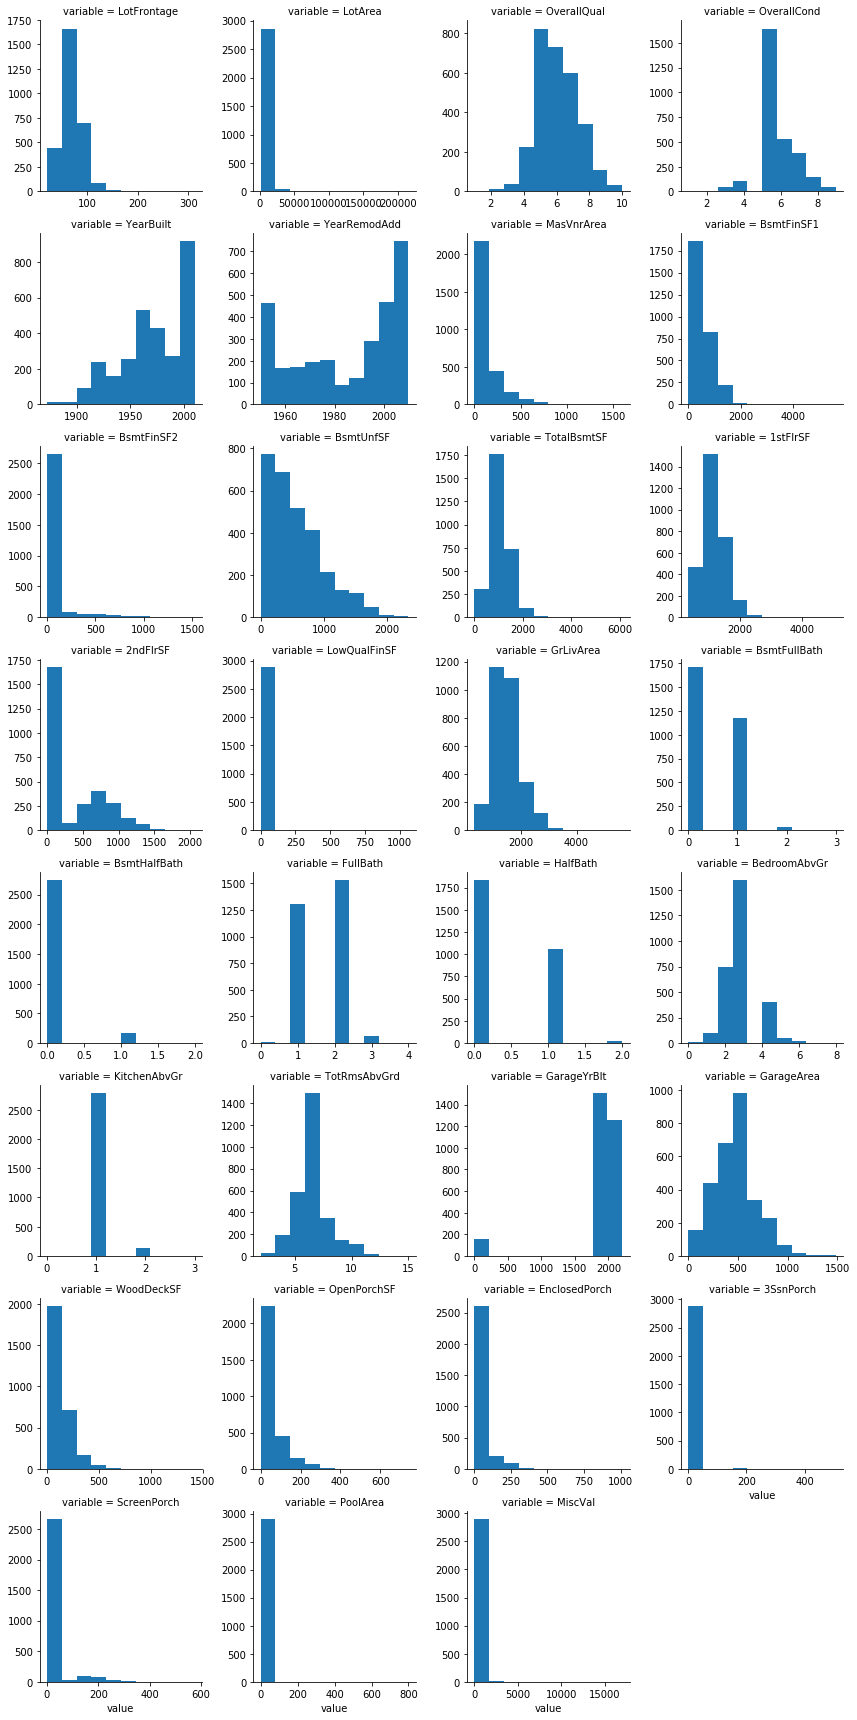

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

m = pd.melt(df, value_vars=num_df)
p = sns.FacetGrid(m, col='variable', col_wrap=4, sharex=False, sharey=False)
p = p.map(plt.hist, 'value')

C:\Users\Dikshant\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


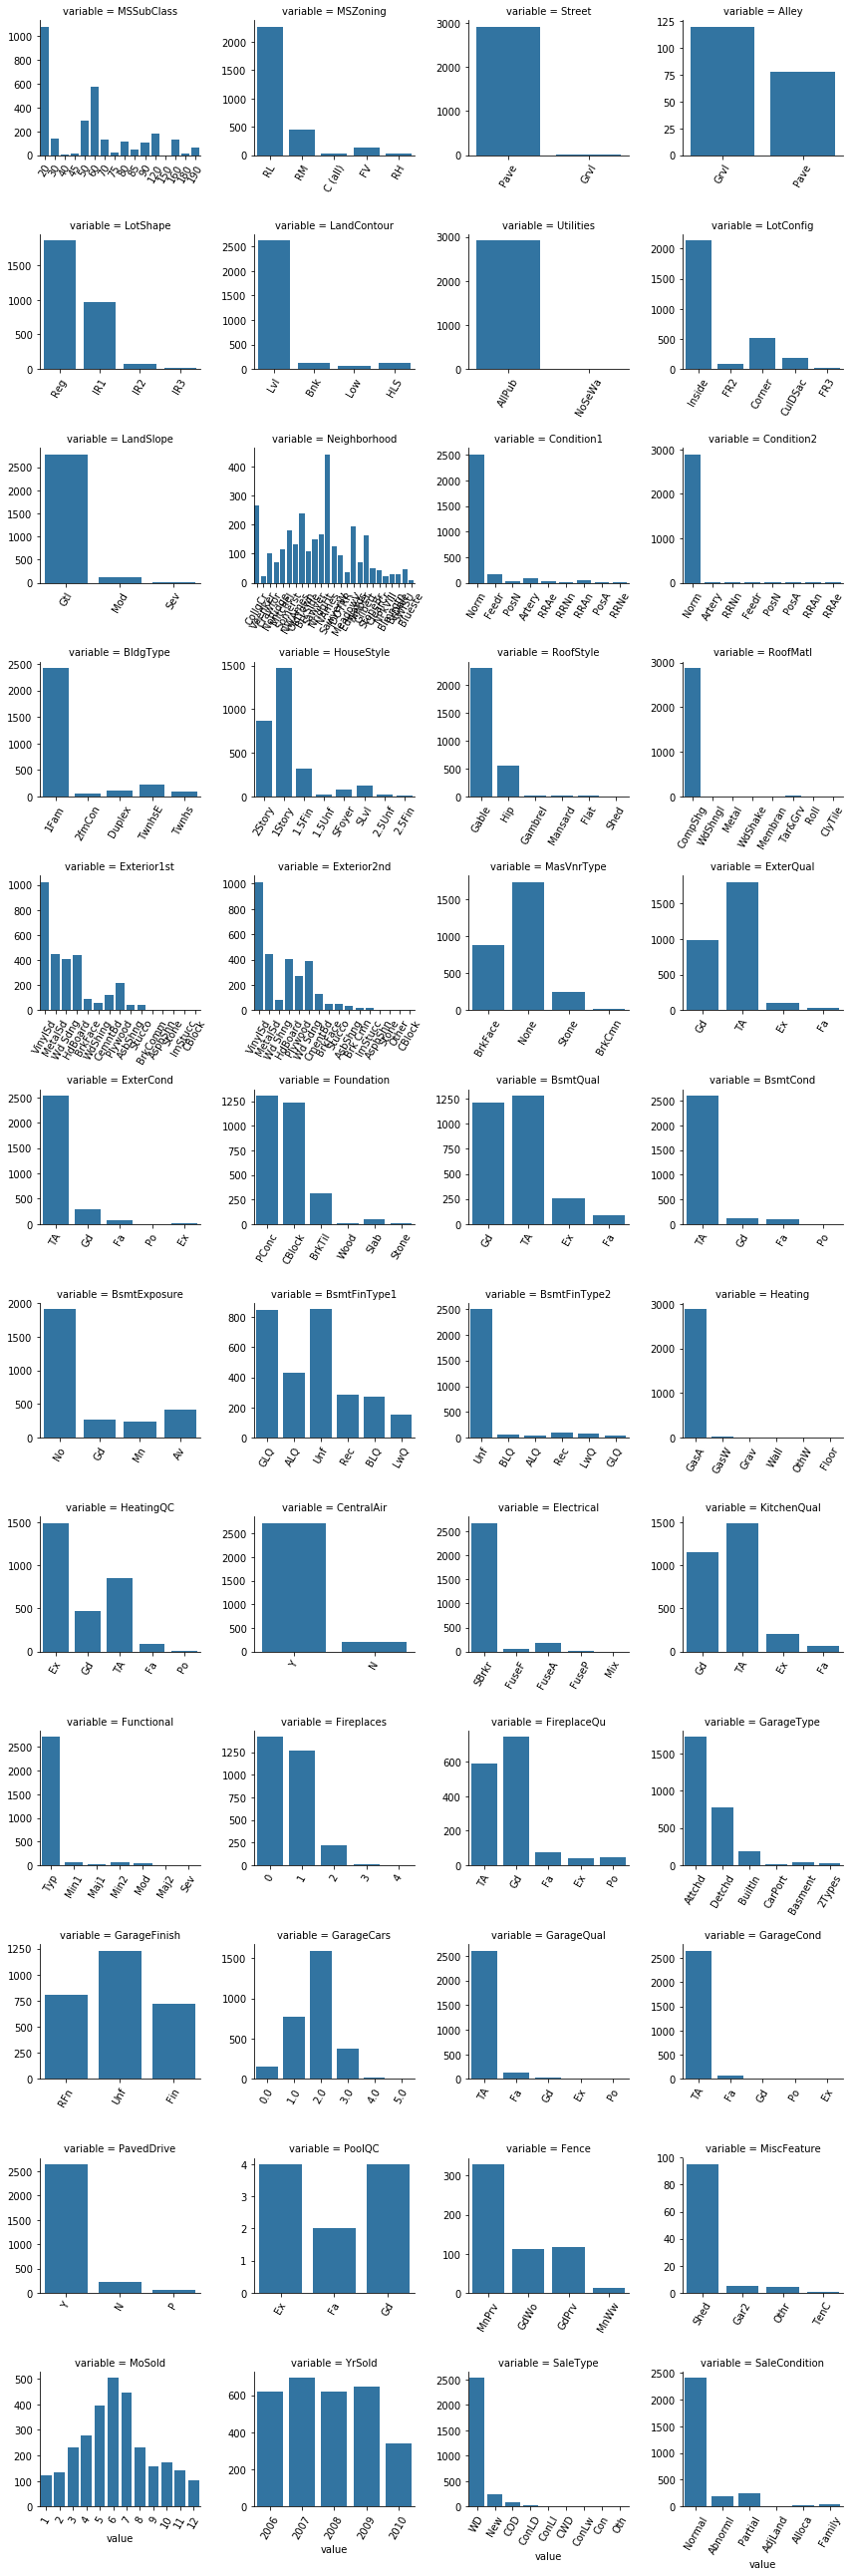

In [8]:
m = pd.melt(df, value_vars=cat_df)
p = sns.FacetGrid(m, col='variable', col_wrap=4, sharex=False, sharey=False)
p = p.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in p.axes.flat]
p.fig.tight_layout()
plt.show()

In [9]:
df[num_df].isnull().sum()[df[num_df].isnull().sum() > 0].sort_values(ascending=False)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64

In [10]:
#We impute missing values of numerical features with 0 since most of these features are missing in that case
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df.LotFrontage = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [11]:
df[cat_df].isnull().sum()[df[cat_df].isnull().sum() > 0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Exterior1st        1
SaleType           1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Electrical         1
dtype: int64

In [12]:
#most of the missing values imply that the feature doesn't exist in that case like missing PoolQC or GarageCond imply that
#there's no pool or garage
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('No MiscFeature')
df['Alley'] = df['Alley'].fillna('No Alley')
df['Fence'] = df['Fence'].fillna('No Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageType'] = df['GarageType'].fillna('No Fireplace')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
#to solve MasVnrType discrepancy
df.loc[(df.MasVnrType == 'None') & (df.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace'
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].value_counts().index[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].value_counts().index[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].value_counts().index[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].value_counts().index[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].value_counts().index[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().index[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].value_counts().index[0])
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].value_counts().index[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().index[0])

In [14]:
df_dummy = pd.get_dummies(df)
df_dummy.shape

(2919, 336)

In [17]:
df_train = df_dummy.iloc[:1460,:]
df_val = df_dummy.iloc[1460:,:]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.copy(), target, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train.loc[:, num_df] = ss.fit_transform(X_train[num_df])
X_test.loc[:, num_df] = ss.transform(X_test[num_df])

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [33]:
lasso = Lasso()
lasso.fit(df_train, target)
y_predict = lasso.predict(df_val)

C:\Users\Dikshant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([113452.00851696, 162484.19214835, 186734.38381986, 197170.75459016,
       209842.6477429 ])

In [39]:
ID = pd.DataFrame(test.index, columns=['Id'])
PRED = pd.DataFrame(y_predict, columns=['SalePrice'])
PREDICTIONS = pd.concat((ID, PRED), axis=1)
PREDICTIONS.head()

,Id,SalePrice
0,1461,113452.008517
1,1462,162484.192148
2,1463,186734.383820
3,1464,197170.754590
4,1465,209842.647743


In [40]:
PREDICTIONS.to_csv('AMES SalesPrice Regression Output.csv', index=False) 